# Regression Methods

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. 

In this notebook you'll find an implementation of a regression models, such as Simple Linear Regression, Multiple Linear Regression and Logistic Regression.  Along our journey, we'll implement some code, explain and clarify some concepts about linear regression models.

For further studies on Linear Regression, see this [link](https://en.wikipedia.org/wiki/Linear_regression).
I also recommend for those who want to dig deeper in linear classifiers this [course](https://www.datacamp.com/courses/linear-classifiers-in-python) from the datacamp website.

## 1. Simple Linear Regression

The dataset used in this section is in a .csv file with GPA and SAT scores from some fictitious US students. We'll analyze this dataset and make a linear regression on the data in order to get some information about the performance of college students and how it is correlated with his/her SAT score.

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [2]:
data = pd.read_csv('1. Simple Linear regression.csv')

In [3]:
# Visualize your data
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
# Visualize some statistics about your data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## 1.1 Create your first regression

### Define the dependent and the independent variable

As we are trying to figure out how much the SAT score can predict a college student performance only by taking their GPA score. It is clear that the dependent variable, $y$, is the GPA scores and the independent variable, $x1$, is the dependent variable. So, we split our dataset into these two classes.

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore the data

From the plot below, we can clearly see that there is a correlation (not necessarily causation) between the SAT score and the GPA score.

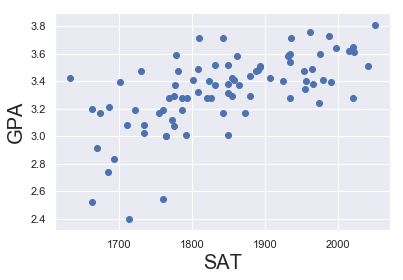

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Regression itself

For computational reasons, we must add a constant columns of 1's to the independent variable set so that our equation for regression is given by 

$$y_{hat} = b_o \times 1 + b_1 \times x_1$$

then, we are free to apply the Ordinary Least Square method to our data and finally fit our model.

Lastly, it is a good practice to summarize the results in order to get some insights about the model like the relevance of the features and how good our model fits the data.

In [7]:
x = sm.add_constant(x1)

In [8]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           7.20e-11
Time:                        11:31:29   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

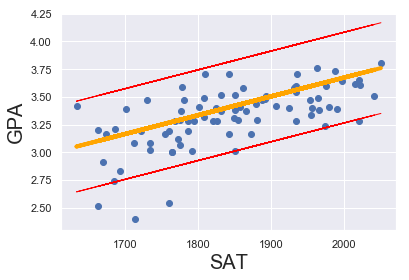

In [9]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1
fig1 = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
yhat1 = 0.2750 + 0.409 + 0.0017*x1
fig2 = plt.plot(x1,yhat1, lw=1, c='red', label = 'positive std error')
yhat2 = 0.2750 - 0.409 + 0.0017*x1
fig3 = plt.plot(x1,yhat2, lw=1, c='red', label = 'negative std error')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()